In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Iniciando df

In [3]:
#importando dados

df_20 = pd.read_csv('state_of_data_2020.csv', low_memory=False)
df_21 = pd.read_csv('state_of_data_2021.csv', low_memory=False)
df_22 = pd.read_csv('State_of_data_2022.csv', low_memory=False)
df_23 = pd.read_csv('State_of_data_2023.csv', low_memory=False)
df_24 = pd.read_csv('State_of_data_2024.csv', low_memory=False)

In [4]:
#df_21["('P2', 'gender')"].value_counts()

In [5]:
for col in df_23.columns:
   print(col)

('P0', 'id')
('P1_a ', 'Idade')
('P1_a_1 ', 'Faixa idade')
('P1_b ', 'Genero')
('P1_c ', 'Cor/raca/etnia')
('P1_d ', 'PCD')
('P1_e ', 'experiencia_profissional_prejudicada')
('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')
('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')
('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')
('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')
('P1_f ', 'aspectos_prejudicados')
('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')
('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')
('P1_f_3', 'Aprovação em processos seletivos/entrevistas')
('P1_f_4', 'Oportunidades de progressão de carreira')
('P1_f_5', 'Velocidade de progressão de carreira')
('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')
('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias')
('P1_f_8', 'Relação com outros membros da empresa, em momentos de trabal

# Preparando dados: padronizar nomes das colunas, selecionar apenas as relevantes e juntar os 3 anos em um único df

In [6]:
def load_data(dfs):
    """
    Carrega e padroniza os datasets do State of Data e padroniza as colunas relacionadas a gênero.
    
    Args:
        dfs: dicionário com ano como chave e DataFrame como valor
        
    Returns:
        DataFrame unificado com os dados dos três anos
    """
    datasets = dfs
    
    gender_columns = {
        '2021': "('P1_b ', 'Genero')",
        '2022': "('P1_b ', 'Genero')",
        '2023': "('P1_b ', 'Genero')",
        '2024': "('1.b_genero')"
    }
    
    column_mapping = {
        # Dados demográficos - Categoria P1
        '2021': {
            'idade': "('P1_a ', 'Idade')",
            'faixa_idade': "('P1_a_a ', 'Faixa idade')",
            'genero': "('P1_b ', 'Genero')",
            'estado': "('P1_e ', 'Estado onde mora')",
            'uf': "('P1_e_a ', 'uf onde mora')",
            'regiao': "('P1_e_b ', 'Regiao onde mora')",
            'regiao_origem': "('P1_g_b ', 'Regiao de origem')",
            'mudou_estado': "('P1_g_c ', 'Mudou de Estado?')",
            'nivel_ensino': "('P1_h ', 'Nivel de Ensino')",
            'area_formacao': "('P1_i ', 'Área de Formação')"
        },
        '2022': {
            'idade': "('P1_a ', 'Idade')",
            'faixa_idade': "('P1_a_1 ', 'Faixa idade')",
            'genero': "('P1_b ', 'Genero')",
            'estado': "('P1_i ', 'Estado onde mora')",
            'uf': "('P1_i_1 ', 'uf onde mora')",
            'regiao': "('P1_i_2 ', 'Regiao onde mora')",
            'regiao_origem': "('P1_k ', 'Regiao de origem')",
            'mudou_estado': "('P1_j ', 'Mudou de Estado?')",
            'nivel_ensino': "('P1_l ', 'Nivel de Ensino')",
            'area_formacao': "('P1_m ', 'Área de Formação')"
        },
        '2023': {
            'idade': "('P1_a ', 'Idade')",
            'faixa_idade': "('P1_a_1 ', 'Faixa idade')",
            'genero': "('P1_b ', 'Genero')",
            'estado': "('P1_i ', 'Estado onde mora')",
            'uf': "('P1_i_1 ', 'uf onde mora')",
            'regiao': "('P1_i_2 ', 'Regiao onde mora')",
            'regiao_origem': "('P1_k ', 'Regiao de origem')",
            'mudou_estado': "('P1_j ', 'Mudou de Estado?')",
            'nivel_ensino': "('P1_l ', 'Nivel de Ensino')",
            'area_formacao': "('P1_m ', 'Área de Formação')"
        },
        '2024': {
            'idade': '1.a_idade',
            'faixa_idade': '1.a.1_faixa_idade',
            'genero': '1.b_genero',
            'estado': '1.i_estado_onde_mora',
            'uf': '1.i.1_uf_onde_mora',
            'regiao': '1.i.2_regiao_onde_mora',
            'regiao_origem': '1.k.2_regiao_de_origem',
            'mudou_estado': '1.j_vive_no_estado_de_formacao',
            'nivel_ensino': '1.l_nivel_de_ensino',
            'area_formacao': '1.m_área_de_formação'
        }
    }
    
    # Colunas para informações profissionais 
    professional_columns = {
    '2021': {
        'situacao': "('P2_a ', 'Qual sua situação atual de trabalho?')",
        'setor': "('P2_b ', 'Setor')",
        'cargo': "('P2_f ', 'Cargo Atual')",
        'gestor':"('P2_d ', 'Gestor?')",
        'nivel': "('P2_g ', 'Nivel')",
        'faixa_salarial': "('P2_h ', 'Faixa salarial')",
        'tempo_area_dados': "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
        'tempo_area_ti': "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
        'modalidade': "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"
    },
    '2022': {
        'situacao': "('P2_a ', 'Qual sua situação atual de trabalho?')",
        'setor': "('P2_b ', 'Setor')",
        'cargo': "('P2_f ', 'Cargo Atual')",
        'gestor':"('P2_d ', 'Gestor?')",
        'nivel': "('P2_g ', 'Nivel')",
        'faixa_salarial': "('P2_h ', 'Faixa salarial')",
        'tempo_area_dados': "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
        'tempo_area_ti': "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
        'modalidade': "('P2_p ', 'Atualmente qual a sua forma de trabalho?')"
    },
    '2023': {
        'situacao': "('P2_a ', 'Qual sua situação atual de trabalho?')",
        'setor': "('P2_b ', 'Setor')",
        'cargo': "('P2_f ', 'Cargo Atual')",
        'gestor':"('P2_d ', 'Gestor?')",
        'nivel': "('P2_g ', 'Nivel')",
        'faixa_salarial': "('P2_h ', 'Faixa salarial')",
        'tempo_area_dados': "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
        'tempo_area_ti': "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
        'modalidade': "('P2_r ', 'Atualmente qual a sua forma de trabalho?')"
    },
    '2024': {
        'situacao': '2.a_situação_de_trabalho',
        'setor': '2.b_setor',
        'cargo': '2.f_cargo_atual',
        'gestor':'2.d_atua_como_gestor',
        'nivel': '2.g_nivel',
        'faixa_salarial': '2.h_faixa_salarial',
        'tempo_area_dados': '2.i_tempo_de_experiencia_em_dados',
        'tempo_area_ti': '2.j_tempo_de_experiencia_em_ti',
        'modalidade': '2.r_modelo_de_trabalho_atual'
    }
}
    
    
    processed_data = []
    
    for year, df in datasets.items():
        
        df['ano_pesquisa'] = year
        
        # Criando um novo DataFrame apenas com colunas relevantes
        year_data = pd.DataFrame()
        year_data['ano_pesquisa'] = df['ano_pesquisa']
        
        # Colunas demográficas
        for new_col, old_col in column_mapping[year].items():
            year_data[new_col] = df[old_col]
        
        # Colunas profissionais
        for new_col, old_col in professional_columns[year].items():
            year_data[new_col] = df[old_col]
        
        processed_data.append(year_data)
 
    combined_data = pd.concat(processed_data, ignore_index=True)
    
    return combined_data

dfs = {
    '2021': df_21,
    '2022': df_22,
    '2023': df_23,
    '2024': df_24
}

df_unificado = load_data(dfs)


In [7]:
df_unificado.head()

,ano_pesquisa,idade,faixa_idade,genero,estado,uf,regiao,regiao_origem,mudou_estado,nivel_ensino,area_formacao,situacao,setor,cargo,gestor,nivel,faixa_salarial,tempo_area_dados,tempo_area_ti,modalidade
0,2021,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,Química / Física,Empregado (CLT),Marketing,NaN,1.0,NaN,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Modelo 100% presencial
1,2021,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,NaN,1.0,NaN,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Modelo híbrido flexível (o funcionário tem lib...
2,2021,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,NaN,1.0,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 2 a 3 anos,Modelo 100% presencial
3,2021,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,NaN,1.0,NaN,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,Menos de 1 ano,Modelo 100% presencial
4,2021,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,NaN,1.0,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 4 a 5 anos,Modelo 100% presencial


In [8]:
df_unificado["ano_pesquisa"].value_counts()

ano_pesquisa
2023    5293
2024    5217
2022    4271
2021    2645
Name: count, dtype: int64

In [9]:
df_rj = df_unificado[df_unificado['uf'] == 'RJ']

In [10]:
df_rj.to_excel("df_rj.xlsx", index=False)

In [11]:
df_rj["tempo_area_dados"].value_counts()

tempo_area_dados
de 1 a 2 anos                             271
de 3 a 4 anos                             241
Mais de 10 anos                           157
Menos de 1 ano                            151
de 5 a 6 anos                             101
de 7 a 10 anos                             78
de 4 a 6 anos                              72
Não tenho experiência na área de dados     66
de 2 a 3 anos                              38
de 4 a 5 anos                              31
de 6 a 10 anos                             25
Name: count, dtype: int64

In [12]:
df_rj["ano_pesquisa"].value_counts().sort_index()

ano_pesquisa
2021    222
2022    338
2023    437
2024    397
Name: count, dtype: int64

In [13]:
# ajustando coluna genero

df_rj = df_rj[df_rj['genero'].isin(['Masculino', 'Feminino'])]


In [14]:
df_rj.groupby("ano_pesquisa")["genero"].value_counts()

ano_pesquisa  genero   
2021          Masculino    178
              Feminino      44
2022          Masculino    260
              Feminino      77
2023          Masculino    327
              Feminino     109
2024          Masculino    293
              Feminino     101
Name: count, dtype: int64

In [15]:
# ajustando nivel ensino 

df_rj.loc[df_rj["nivel_ensino"] == 'Prefiro não informar', "nivel_ensino"] = np.nan

df_rj.loc[df_rj["nivel_ensino"] == 'Pós-graduação', "nivel_ensino"] = 'Especialização Lato Sensu'

ordem_nivel_ensino = ['Não tenho graduação formal', 'Estudante de Graduação', 
                      'Graduação/Bacharelado', 'Especialização Lato Sensu', 
                      'Mestrado', 'Doutorado ou Phd']

df_rj['nivel_ensino'] = pd.Categorical(df_rj['nivel_ensino'], categories=ordem_nivel_ensino, ordered=True)

In [16]:
df_rj.groupby("ano_pesquisa")["nivel_ensino"].value_counts()

ano_pesquisa  nivel_ensino              
2021          Especialização Lato Sensu      63
              Graduação/Bacharelado          62
              Mestrado                       40
              Estudante de Graduação         36
              Doutorado ou Phd               12
              Não tenho graduação formal      8
2022          Graduação/Bacharelado         108
              Especialização Lato Sensu     104
              Estudante de Graduação         56
              Mestrado                       50
              Doutorado ou Phd               11
              Não tenho graduação formal      7
2023          Graduação/Bacharelado         138
              Especialização Lato Sensu     136
              Mestrado                       72
              Estudante de Graduação         67
              Doutorado ou Phd               16
              Não tenho graduação formal      6
2024          Graduação/Bacharelado         142
              Especialização Lato Sensu     127

In [17]:
# ajustando faixa salarial

df_rj["faixa_salarial"] = df_rj["faixa_salarial"].str.replace(r"\s+", " ", regex=True).str.strip()

df_rj["faixa_salarial"] = df_rj["faixa_salarial"].replace({
    'de R$ 1.001/mês a R$ 2.000/mês': "R$1k-2k",
    'de R$ 2.001/mês a R$ 3.000/mês': "R$2k-3k",
    'de R$ 2.001/mês a R$ 3000/mês': "R$2k-3k",
    'de R$ 3.001/mês a R$ 4.000/mês': "R$3k-4k", 
    'de R$ 4.001/mês a R$ 6.000/mês': "R$4k-6k",
    'de R$ 6.001/mês a R$ 8.000/mês': "R$6k-8k",
    'de R$ 8.001/mês a R$ 12.000/mês': "R$8k-12k",
    'de R$ 12.001/mês a R$ 16.000/mês': "R$12k-16k",
    'de R$ 16.001/mês a R$ 20.000/mês': "R$16k-20k",
    'de R$ 20.001/mês a R$ 25.000/mês': "R$20k-25k",
    'de R$ 25.001/mês a R$ 30.000/mês': "R$25k-30k",
    'de R$ 30.001/mês a R$ 40.000/mês': "R$30k-40k",
    'Acima de R$ 40.001/mês': "R$40k"
})

faixas_salariais_ordem = [ 
    'R$1k-2k',
    'R$2k-3k',
    'R$3k-4k', 
    'R$4k-6k',
    'R$6k-8k',
    'R$8k-12k',
    'R$12k-16k',
    'R$16k-20k',
    'R$20k-25k',
    'R$25k-30k',
    'R$30k-40k',
    'R$40k'
]

df_rj['faixa_salarial'] = pd.Categorical(df_rj['faixa_salarial'], categories=faixas_salariais_ordem, ordered=True)


In [18]:
df_rj.groupby("ano_pesquisa")["faixa_salarial"].value_counts()

ano_pesquisa  faixa_salarial
2021          R$8k-12k          46
              R$4k-6k           36
              R$6k-8k           28
              R$2k-3k           18
              R$12k-16k         18
              R$3k-4k           12
              R$1k-2k           10
              R$16k-20k         10
              R$20k-25k          4
              R$25k-30k          2
              R$30k-40k          1
              R$40k              1
2022          R$8k-12k          63
              R$12k-16k         44
              R$4k-6k           41
              R$3k-4k           33
              R$6k-8k           29
              R$2k-3k           23
              R$1k-2k           19
              R$16k-20k         14
              R$25k-30k          7
              R$20k-25k          5
              R$30k-40k          3
              R$40k              0
2023          R$8k-12k          95
              R$4k-6k           58
              R$6k-8k           48
              R$12k-16k   

In [19]:
# ajustando cargos

mapeamento = {
    # Analista de Dados
    'Analista de Dados/Data Analyst': 'Analista de Dados',
    'Analista de BI/BI Analyst': 'Analista de Dados',
    'Analista de BI/BI Analyst/Analytics Engineer': 'Analista de Dados',
    'Analista de Negócios/Business Analyst': 'Analista de Dados',
    'Analista de Inteligência de Mercado/Market Intelligence': 'Analista de Dados',
    'Analista de Marketing': 'Analista de Dados',
    'Analista Administrativo': 'Analista de Dados',
    'Estatístico': 'Analista de Dados',
    'Economista': 'Analista de Dados',
    
    # Engenheiro de Dados
    'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect': 'Engenheiro de Dados',
    'Engenheiro de Dados/Data Engineer': 'Engenheiro de Dados',
    'Analytics Engineer': 'Engenheiro de Dados',
    'Arquiteto de Dados': 'Engenheiro de Dados',
    'Arquiteto de dados': 'Engenheiro de Dados',
    'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
    
    # Cientista de Dados
    'Cientista de Dados/Data Scientist': 'Cientista de Dados',
    'Engenheiro de Machine Learning/ML Engineer': 'Cientista de Dados',
    'Engenheiro de Machine Learning/ML Engineer/AI Engineer': 'Cientista de Dados',
    
    # Professor/Pesquisador
    'Professor': 'Professor/Pesquisador',
    'Professor/Pesquisador': 'Professor/Pesquisador',
    
    # Product Manager
    'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)': 'Product Manager',
    'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)': 'Product Manager',
    'Product Manager': 'Product Manager',
    
    # Desenvolvedor
    'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas': 'Desenvolvedor',
    'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor',
    'Analista de Sistemas/Analista de TI': 'Desenvolvedor',
    'Analista de Suporte/Analista Técnico': 'Desenvolvedor',
    'Suporte Técnico': 'Desenvolvedor',
    'Técnico': 'Desenvolvedor',
    
    # Categorias que não se encaixam exatamente
    'Outra Opção': 'Outro',
    'Outro': 'Outro',
    'Outras Engenharias (não inclui dev)': 'Outro'
}

df_rj['cargo'] = df_rj['cargo'].map(mapeamento).fillna(df_rj['cargo'])

In [20]:
df_rj.groupby("ano_pesquisa")["cargo"].value_counts()

ano_pesquisa  cargo                                           
2021          Analista de Dados                                    84
              Cientista de Dados                                   34
              Engenheiro de Dados                                  17
              Desenvolvedor                                         9
              Outro                                                 9
2022          Analista de Dados                                    93
              Cientista de Dados                                   53
              Engenheiro de Dados                                  43
              Outro                                                28
              Desenvolvedor                                        13
              Professor/Pesquisador                                 1
2023          Analista de Dados                                   151
              Engenheiro de Dados                                  69
              Cientista de 

In [21]:
# ajustando nivel senioridade

df_rj["nivel"] = df_rj["nivel"].astype('category')

if 'Gestor' not in df_rj["nivel"].cat.categories:
    df_rj["nivel"] = df_rj["nivel"].cat.add_categories(['Gestor'])


df_rj.loc[df_rj["gestor"] == 1.0, "nivel"] = "Gestor"

df_rj["nivel"] = df_rj["nivel"].cat.reorder_categories(['Júnior', 'Pleno', 'Sênior', 'Gestor'])


In [22]:
df_rj.groupby("ano_pesquisa")["regiao_origem"].value_counts()

ano_pesquisa  regiao_origem                 
2021          Sudeste                           21
              Nordeste                           9
              Sul                                5
              Centro-oeste                       2
2022          Sudeste                           26
              Nordeste                           9
              Sul                                7
              Centro-oeste                       1
              Norte                              1
2023          São Paulo (SP)                    17
              Minas Gerais (MG)                 13
              Bahia (BA)                         5
              Santa Catarina (SC)                3
              Ceará (CE)                         2
              Distrito Federal (DF)              2
              Espírito Santo (ES)                2
              Maranhão (MA)                      2
              Mato Grosso (MT)                   2
              Nasci/me formei fora do

In [23]:
mapeamento_areas = {
    # TI / Computação
    "Computação / Engenharia de Software / Sistemas de Informação/ TI": "Computação / Engenharia de Software / TI",

    # Engenharia
    "Outras Engenharias": "Engenharia (outras)",
    "Outras Engenharias (não incluir engenharia de software ou TI)": "Engenharia (outras)",

    # Economia / Administração / Finanças
    "Economia/ Administração / Contabilidade / Finanças/ Negócios": "Economia / Administração / Finanças / Negócios",
    "Economia/ Administração / Contabilidade / Finanças": "Economia / Administração / Finanças / Negócios",

    # Estatística / Matemática
    "Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais": "Estatística / Matemática / Ciências Atuariais",
    "Estatística/ Matemática / Matemática Computacional": "Estatística / Matemática / Ciências Atuariais",

    # Química / Física
    "Química / Física": "Química / Física",

    # Saúde
    "Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde": "Ciências Biológicas / Medicina / Saúde",
    "Ciências Biológicas/Farmácia/Medicina/Área da Saúde": "Ciências Biológicas / Medicina / Saúde",

    # Marketing / Comunicação
    "Marketing / Publicidade / Comunicação / Jornalismo": "Marketing / Comunicação / Jornalismo",
    "Marketing / Publicidade / Comunicação / Jornalismo / Ciências Sociais": "Marketing / Comunicação / Jornalismo",

    # Ciências Sociais
    "Ciências Sociais": "Ciências Sociais",

    # Outras
    "Outra opção": "Outras",
    "Outras": "Outras",
}

df_rj["area_formacao"] = df_rj["area_formacao"].replace(mapeamento_areas)

In [24]:
df_rj["situacao"].value_counts()

situacao
Empregado (CLT)                                                         939
Empreendedor ou Empregado (CNPJ)                                        120
Desempregado, buscando recolocação                                       98
Estagiário                                                               79
Servidor Público                                                         39
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil          29
Somente Estudante (graduação)                                            28
Trabalho na área Acadêmica/Pesquisador                                   21
Freelancer                                                               15
Somente Estudante (pós-graduação)                                         9
Desempregado e não estou buscando recolocação                             7
Prefiro não informar                                                      4
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)      1
Nam

In [25]:
mapeamento_situacao = {
    # Trabalho formal
    "Empregado (CLT)": "Empregado (CLT)",
    "Empreendedor ou Empregado (CNPJ)": "Empreendedor ou Empregado (CNPJ)",
    "Servidor Público": "Servidor Público",
    "Trabalho na área Acadêmica/Pesquisador": "Trabalho na área Acadêmica/Pesquisador",
    "Freelancer": "Freelancer",
    "Estagiário": "Estagiário",

    # Trabalho remoto internacional
    "Vivo no Brasil e trabalho remoto para empresa de fora do Brasil": "Vivo no Brasil e trabalho remoto para fora do país",
    "Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)": "Vivo no Brasil e trabalho remoto para fora do país",

    # Situação de desemprego
    "Desempregado, buscando recolocação": "Desempregado",
    "Desempregado e não estou buscando recolocação": "Desempregado",

    # Estudantes
    "Somente Estudante (graduação)": "Somente Estudante",
    "Somente Estudante (pós-graduação)": "Somente Estudante",

    # Remover
    "Prefiro não informar": None
}

# Aplicar o mapeamento
df_rj["situacao"] = df_rj["situacao"].replace(mapeamento_situacao)

# Dropar valores nulos (ex: "Prefiro não informar")
df_rj = df_rj[df_rj["situacao"].notna()]


In [26]:
df_rj.head()

,ano_pesquisa,idade,faixa_idade,genero,estado,uf,regiao,regiao_origem,mudou_estado,nivel_ensino,area_formacao,situacao,setor,cargo,gestor,nivel,faixa_salarial,tempo_area_dados,tempo_area_ti,modalidade
53,2021,39.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Não tenho graduação formal,NaN,Empregado (CLT),Varejo,NaN,1.0,Gestor,R$8k-12k,de 6 a 10 anos,Não tive experiência na área de TI/Engenharia ...,Modelo 100% remoto
54,2021,33.0,30-34,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Especialização Lato Sensu,Computação / Engenharia de Software / TI,Empregado (CLT),Varejo,NaN,1.0,Gestor,R$8k-12k,Mais de 10 anos,de 1 a 2 anos,Modelo híbrido com dias fixos de trabalho pres...
57,2021,37.0,35-39,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Especialização Lato Sensu,Computação / Engenharia de Software / TI,Empregado (CLT),Marketing,NaN,1.0,Gestor,R$20k-25k,de 6 a 10 anos,Mais de 10 anos,Modelo 100% remoto
85,2021,32.0,30-34,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,Sudeste,1,Especialização Lato Sensu,Economia / Administração / Finanças / Negócios,Servidor Público,Setor Público,NaN,1.0,Gestor,R$8k-12k,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,Modelo 100% presencial
88,2021,35.0,35-39,Feminino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Especialização Lato Sensu,Economia / Administração / Finanças / Negócios,Empregado (CLT),Internet/Ecommerce,NaN,1.0,Gestor,R$20k-25k,de 6 a 10 anos,Não tive experiência na área de TI/Engenharia ...,Modelo 100% remoto


# Visualizando os dados

In [27]:
# Distribuição faixa salarial x genero

def criar_piramide_salarial(df_rj):
    # Configurações de cores
    cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

    # Criando figura com subplots
    fig = make_subplots(
        rows=1,
        cols=4,
        subplot_titles=("2021", "2022", "2023", "2024"),
        shared_yaxes=True
    )

    anos = ['2021', '2022', '2023', '2024']

    for idx, ano in enumerate(anos, 1):
        # Filtrando dados do ano atual
        df_grouped = df_rj[df_rj["ano_pesquisa"] == ano]
        df_grouped = df_grouped.groupby(["faixa_salarial", "genero"]).size().reset_index(name="count")
        
        # Pivot para separar por gênero
        df_plot = df_grouped.pivot(index="faixa_salarial", columns="genero", values="count").fillna(0)

        # Garantindo que as colunas existam
        for genero in ["Masculino", "Feminino"]:
            if genero not in df_plot.columns:
                df_plot[genero] = 0

        # Adicionando barras para Feminino
        fig.add_trace(
            go.Bar(
                y=df_plot.index,
                x=df_plot["Feminino"],
                name="Feminino",  # Removemos o ano para agrupar na legenda
                orientation="h",
                marker=dict(color=cores["Feminino"]),
                text=df_plot["Feminino"].astype(int),
                showlegend=True if idx == 1 else False  # Exibe legenda apenas no primeiro ano
            ),
            row=1,
            col=idx
        )

        # Adicionando barras para Masculino
        fig.add_trace(
            go.Bar(
                y=df_plot.index,
                x=df_plot["Masculino"],
                name="Masculino",  # Removemos o ano para agrupar na legenda
                orientation="h",
                marker=dict(color=cores["Masculino"]),
                text=df_plot["Masculino"].astype(int),
                showlegend=True if idx == 1 else False  # Exibe legenda apenas no primeiro ano
            ),
            row=1,
            col=idx
        )

    # Configurando layout
    fig.update_layout(
        title="Distribuição Salarial por Gênero (2021-2024)",
        template="plotly_white",
        height=600,
        bargap=0.1,
        showlegend=True
    )

    # Configurando eixos
    fig.update_xaxes(title_text="Quantidade de pessoas")
    fig.update_yaxes(title_text="Faixa Salarial")

    return fig

# Usar a função
fig = criar_piramide_salarial(df_rj)
fig.show()

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\686790294.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\686790294.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\686790294.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\686790294.py:20: FutureWarning:

Th

In [28]:
# Proporção niveis senioridade x genero

# Criando um DataFrame agrupado para contar quantas pessoas há por nível de senioridade e gênero
df_grouped = df_rj.groupby(["ano_pesquisa", "nivel", "genero"]).size().reset_index(name="count")

# Calculando o total por ano e gênero para depois calcular proporções
totais_por_ano_genero = df_rj.groupby(["ano_pesquisa", "genero"]).size().reset_index(name="total")
df_grouped = df_grouped.merge(totais_por_ano_genero, on=["ano_pesquisa", "genero"])

# Calculando a proporção
df_grouped["proporção"] = df_grouped["count"] / df_grouped["total"] * 100

# Criando a figura com subplots
fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=["2021", "2022", "2023", "2024"])

anos = ['2021', '2022', '2023', '2024']
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

for i, ano in enumerate(anos):
    # Filtrando dados do ano atual
    df_ano = df_grouped[df_grouped["ano_pesquisa"] == ano]
    
    # Criando um pivot para senioridade x gênero
    df_plot = df_ano.pivot(index="nivel", columns="genero", values="proporção").fillna(0)
    
    # Garantindo que as colunas existam, preenchendo com 0 se necessário
    for genero in ["Masculino", "Feminino"]:
        if genero not in df_plot.columns:
            df_plot[genero] = 0
    
    # Filtrando níveis que têm pelo menos um registro
    df_plot = df_plot[(df_plot["Masculino"] > 0) | (df_plot["Feminino"] > 0)]
    
    # Se não houver dados, continue para o próximo ano
    if df_plot.empty:
        continue
    
    # Adicionando barras para Feminino (negativo para inverter no gráfico)
    fig.add_trace(go.Bar(
        y=df_plot.index,
        x=-df_plot["Feminino"],
        name="Feminino",
        orientation="h",
        marker=dict(color=cores["Feminino"]),
        text=[f"{val:.1f}%" for val in df_plot["Feminino"]],
        textposition="outside",
        showlegend=True if i == 0 else False
    ), row=1, col=i+1)

    # Adicionando barras para Masculino
    fig.add_trace(go.Bar(
        y=df_plot.index,
        x=df_plot["Masculino"],
        name="Masculino",
        orientation="h",
        marker=dict(color=cores["Masculino"]),
        text=[f"{val:.1f}%" for val in df_plot["Masculino"]],
        textposition="outside",
        showlegend=True if i == 0 else False
    ), row=1, col=i+1)

# Configurando layout
fig.update_layout(
    title="Distribuição de Senioridade por Gênero (2021-2024)",
    xaxis_title="Proporção (%)",
    yaxis_title="Nível de Senioridade",
    barmode="relative",
    template="plotly_white"
)

# Ajustando os eixos X para mostrar valores em percentuais
for i in range(1, 5):
    fig.update_xaxes(ticksuffix="%", range=[-100, 100], row=1, col=i)
    
    # Adicionando linhas de referência em 0
    fig.add_shape(
        type="line",
        x0=0, y0=-0.5,
        x1=0, y1=len(df_plot.index) - 0.5,
        line=dict(color="black", width=1, dash="dot"),
        row=1, col=i
    )

fig.show()

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\3509208384.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:

niveis_desejados = ["Júnior", "Pleno", "Sênior", "Gestor"] 

# Normaliza os nomes dos níveis para minúsculas no filtro
df_filtrado = df_rj[df_rj["nivel"].str.lower().isin([n.lower() for n in niveis_desejados])]

# Agora agrupe pelos campos desejados
df_grouped = df_filtrado.groupby(["ano_pesquisa", "nivel", "genero"]).size().reset_index(name="count")

# Calculando o total por ano e gênero para depois calcular proporções
totais_por_ano_genero = df_filtrado.groupby(["ano_pesquisa", "genero"]).size().reset_index(name="total")
df_grouped = df_grouped.merge(totais_por_ano_genero, on=["ano_pesquisa", "genero"])

# Calculando a proporção
df_grouped["proporção"] = df_grouped["count"] / df_grouped["total"] * 100

# Verificação (opcional): soma das proporções por ano e gênero deve ser 100%
verificacao = df_grouped.groupby(["ano_pesquisa", "genero"])["proporção"].sum().reset_index()
print("Verificação das somas por gênero:")
print(verificacao)

fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=["2021", "2022", "2023", "2024"])

anos = ['2021', '2022', '2023', '2024']
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

for i, ano in enumerate(anos):
    # Filtrando dados do ano atual
    df_ano = df_grouped[df_grouped["ano_pesquisa"] == ano]
    
    # Criando um pivot para senioridade x gênero
    df_plot = df_ano.pivot(index="nivel", columns="genero", values="proporção").fillna(0)
    
    # Garantindo que as colunas existam, preenchendo com 0 se necessário
    for genero in ["Masculino", "Feminino"]:
        if genero not in df_plot.columns:
            df_plot[genero] = 0
    
    # Filtrando níveis que têm pelo menos um registro
    df_plot = df_plot[(df_plot["Masculino"] > 0) | (df_plot["Feminino"] > 0)]
    
    # Se não houver dados, continue para o próximo ano
    if df_plot.empty:
        continue
    
    # Adicionando barras para Feminino (negativo para inverter no gráfico)
    # Arredondando as porcentagens para números inteiros
    fig.add_trace(go.Bar(
        y=df_plot.index,
        x=-df_plot["Feminino"],
        name="Feminino",
        orientation="h",
        marker=dict(color=cores["Feminino"]),
        text=[f"{int(round(val))}%" for val in df_plot["Feminino"]],  # Arredondamento para inteiros
        textposition="outside",
        showlegend=True if i == 0 else False
    ), row=1, col=i+1)

    # Adicionando barras para Masculino
    # Arredondando as porcentagens para números inteiros
    fig.add_trace(go.Bar(
        y=df_plot.index,
        x=df_plot["Masculino"],
        name="Masculino",
        orientation="h",
        marker=dict(color=cores["Masculino"]),
        text=[f"{int(round(val))}%" for val in df_plot["Masculino"]],  # Arredondamento para inteiros
        textposition="outside",
        showlegend=True if i == 0 else False
    ), row=1, col=i+1)

# Configurando layout
fig.update_layout(
    title="Distribuição de Senioridade por Gênero (2021-2024)",
    xaxis_title="Proporção (%)",
    yaxis_title="Nível de Senioridade",
    barmode="relative",
    template="plotly_white"
)

# Ajustando os eixos X para mostrar valores em percentuais
for i in range(1, 5):
    fig.update_xaxes(ticksuffix="%", range=[-100, 100], row=1, col=i)
    
    # Adicionando linhas de referência em 0
    fig.add_shape(
        type="line",
        x0=0, y0=-0.5,
        x1=0, y1=len(df_plot.index) - 0.5,
        line=dict(color="black", width=1, dash="dot"),
        row=1, col=i
    )

fig.show()

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\148492902.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Verificação das somas por gênero:
  ano_pesquisa     genero  proporção
0         2021   Feminino      100.0
1         2021  Masculino      100.0
2         2022   Feminino      100.0
3         2022  Masculino      100.0
4         2023   Feminino      100.0
5         2023  Masculino      100.0
6         2024   Feminino      100.0
7         2024  Masculino      100.0


In [30]:
# Distribuição escolaridade x genero

df_grouped = df_rj.groupby(["ano_pesquisa", "nivel_ensino", "genero"]).size().reset_index(name="count")

totais_por_ano_nivel = df_rj.groupby(["ano_pesquisa", "nivel_ensino"]).size().reset_index(name="total_nivel")
df_grouped = df_grouped.merge(totais_por_ano_nivel, on=["ano_pesquisa", "nivel_ensino"])

df_grouped["proporção"] = df_grouped["count"] / df_grouped["total_nivel"] * 100

fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=["2021", "2022", "2023", "2024"])

anos = ['2021', '2022', '2023', '2024']
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

ordem_niveis = [
    'Não tenho graduação formal', 
    'Estudante de Graduação',
    'Graduação/Bacharelado', 
    'Pós-graduação',
    'Mestrado',
    'Doutorado ou Phd'
]

for i, ano in enumerate(anos):
   
    df_ano = df_grouped[df_grouped["ano_pesquisa"] == ano]
    
    for nivel in ordem_niveis:
        df_nivel = df_ano[df_ano["nivel_ensino"] == nivel]
        
        if df_nivel.empty:
            continue
        
        
        proporcoes = {genero: df_nivel[df_nivel["genero"] == genero]["proporção"].values[0] 
                      if not df_nivel[df_nivel["genero"] == genero].empty else 0 
                      for genero in ["Masculino", "Feminino"]}
        
        
        for genero in ["Feminino", "Masculino"]:
            fig.add_trace(go.Bar(
                y=[nivel],
                x=[proporcoes[genero]],
                name=genero,
                orientation="h",
                marker=dict(color=cores[genero]),
                text=f"{proporcoes[genero]:.1f}%",
                textposition="inside",
                showlegend=True if i == 0 and nivel == ordem_niveis[0] else False
            ), row=1, col=i+1)

# Configurando layout
fig.update_layout(
    title="Distribuição por Gênero em Cada Nível de Formação Acadêmica (2021-2024)",
    xaxis_title="Proporção (%)",
    yaxis_title="Nível de Formação",
    barmode="stack",
    height=600,
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

# Ajustando os eixos X para mostrar valores em percentuais
for i in range(1, 5):
    fig.update_xaxes(ticksuffix="%", range=[0, 100], row=1, col=i)
    

fig.show()

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\3662411243.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\3662411243.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [31]:
# distribuição area formação x genero

df = df_rj[df_rj['area_formacao'] != "Não classificado"].copy()

df_contagem = df.groupby(['area_formacao', 'ano_pesquisa', 'genero']).size().reset_index(name='contagem')


cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}


areas_unicas = df_contagem.groupby('area_formacao')['contagem'].sum().sort_values(ascending=False).index.tolist()
anos = sorted(df_contagem['ano_pesquisa'].unique())
generos = ["Feminino", "Masculino"]


n_cols = 3  
n_rows = -(-len(areas_unicas) // n_cols)  


fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=areas_unicas,
    shared_xaxes=True,
    horizontal_spacing=0.07,
    vertical_spacing=0.12
)


for i, area in enumerate(areas_unicas):
    row = i // n_cols + 1
    col = i % n_cols + 1
    
    for genero in generos:
        df_filtrado = df_contagem[(df_contagem['area_formacao'] == area) & 
                                  (df_contagem['genero'] == genero)]
        
        x_anos = []
        y_contagens = []
        
        for ano in anos:
            df_ano = df_filtrado[df_filtrado['ano_pesquisa'] == ano]
            y_contagens.append(df_ano['contagem'].values[0] if not df_ano.empty else 0)
            x_anos.append(ano)
        
        fig.add_trace(
            go.Bar(
                x=x_anos,
                y=y_contagens,
                name=genero,
                marker_color=cores[genero],
                text=y_contagens,
                textposition='auto',
                showlegend=i == 0
            ),
            row=row, col=col
        )

fig.update_layout(
    title='Distribuição de Áreas de Formação por Ano e Gênero',
    height=min(1000, n_rows * 250),
    width=1200,
    template='plotly_white',
    barmode='group',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(t=80, b=50, l=50, r=50)
)


for i in range(1, n_rows + 1):
    for j in range(1, n_cols + 1):
        if (i-1) * n_cols + j <= len(areas_unicas):
            fig.update_xaxes(title_text="Ano" if i == n_rows else "", tickangle=45, row=i, col=j)
            if j == 1:
                fig.update_yaxes(title_text="Quantidade", row=i, col=j)

fig.show()


In [32]:
# Distribuição escolaridade x genero - VALORES ABSOLUTOS, BARRAS LADO A LADO, SEM REPETIR NOME DO GÊNERO NO EIXO Y

df_grouped = df_unificado.groupby(["ano_pesquisa", "nivel_ensino", "genero"]).size().reset_index(name="count")

fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=["2021", "2022", "2023", "2024"])

anos = ['2021', '2022', '2023', '2024']
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

ordem_niveis = [
    'Não tenho graduação formal', 
    'Estudante de Graduação',
    'Graduação/Bacharelado', 
    'Especialização Lato Sensu',
    'Mestrado',
    'Doutorado ou Phd'
]

for i, ano in enumerate(anos):
    df_ano = df_grouped[df_grouped["ano_pesquisa"] == ano]
    
    for genero in ["Feminino", "Masculino"]:
        counts = []
        niveis = []
        
        for nivel in ordem_niveis:
            df_nivel = df_ano[(df_ano["nivel_ensino"] == nivel) & (df_ano["genero"] == genero)]
            count = df_nivel["count"].values[0] if not df_nivel.empty else 0
            counts.append(count)
            niveis.append(nivel)
        
        fig.add_trace(go.Bar(
            y=niveis,
            x=counts,
            name=genero,
            orientation="h",
            marker=dict(color=cores[genero]),
            text=[str(c) for c in counts],
            textposition="outside",
            textfont=dict(color="black"),
            showlegend=True if i == 0 else False
        ), row=1, col=i+1)

# Configurando layout
fig.update_layout(
    title="Distribuição Absoluta por Gênero em Cada Nível de Formação Acadêmica (2021-2024)",
    xaxis_title="Quantidade",
    yaxis_title="Nível de Formação",
    barmode="group",  # Barras lado a lado
    height=800,
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.show()


In [33]:
df_grouped = df_rj.groupby(["ano_pesquisa", "nivel_ensino", "genero"]).size().reset_index(name="count")

# Não precisamos mais calcular a proporção, mas podemos manter os totais por nível para referência
totais_por_ano_nivel = df_rj.groupby(["ano_pesquisa", "nivel_ensino"]).size().reset_index(name="total_nivel")
df_grouped = df_grouped.merge(totais_por_ano_nivel, on=["ano_pesquisa", "nivel_ensino"])

fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=["2021", "2022", "2023", "2024"])

anos = ['2021', '2022', '2023', '2024']
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

ordem_niveis = [
    'Não tenho graduação formal', 
    'Estudante de Graduação',
    'Graduação/Bacharelado', 
    'Pós-graduação',
    'Mestrado',
    'Doutorado ou Phd'
]

# Definir uma largura fixa para as barras
largura_barra = 0.7

for i, ano in enumerate(anos):
   
    df_ano = df_grouped[df_grouped["ano_pesquisa"] == ano]
    
    for nivel in ordem_niveis:
        df_nivel = df_ano[df_ano["nivel_ensino"] == nivel]
        
        if df_nivel.empty:
            continue
        
        # Usando valores absolutos (count) em vez de proporção
        contagens = {genero: df_nivel[df_nivel["genero"] == genero]["count"].values[0] 
                      if not df_nivel[df_nivel["genero"] == genero].empty else 0 
                      for genero in ["Masculino", "Feminino"]}
        
        for genero in ["Feminino", "Masculino"]:
            fig.add_trace(go.Bar(
                y=[nivel],
                x=[contagens[genero]],
                name=genero,
                orientation="h",
                marker=dict(color=cores[genero]),
                text=f"{int(contagens[genero])}",  # Formatando como número inteiro
                textposition="inside",
                textangle=0,  # Garantindo que o texto esteja na horizontal
                width=largura_barra,  # Definindo uma largura fixa para todas as barras
                showlegend=True if i == 0 and nivel == ordem_niveis[0] else False
            ), row=1, col=i+1)

# Configurando layout
fig.update_layout(
    title="Distribuição por Gênero em Cada Nível de Formação Acadêmica (2021-2023)",
    xaxis_title="Contagem Absoluta",
    yaxis_title="Nível de Formação",
    barmode="stack",
    height=600,
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    uniformtext_minsize=10,  # Tamanho mínimo do texto para garantir legibilidade
    uniformtext_mode='hide',  # Esconde o texto se não couber na barra
    bargap=0.2,  # Espaçamento entre grupos de barras
    bargroupgap=0.1  # Espaçamento entre barras do mesmo grupo
)

# Ajustando os eixos X e configurando uniformidade entre os subplots
max_value = df_grouped["count"].max() * 1.1  # 10% a mais para dar margem

for i in range(1, 5):
    fig.update_xaxes(
        row=1, 
        col=i, 
        range=[0, max_value],  # Definindo a mesma escala para todos os gráficos
        tickformat=",d"  # Formato para inteiros com separador de milhar
    )

# Definindo a mesma escala para o eixo Y em todos os subplots
fig.update_yaxes(
    categoryorder='array',
    categoryarray=ordem_niveis
)
    
fig.show()

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\2667755927.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\julli\AppData\Local\Temp\ipykernel_24260\2667755927.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [34]:
df_grouped = df_rj.groupby(["ano_pesquisa", "nivel_ensino", "genero"]).size().reset_index(name="count")

fig = make_subplots(
    rows=1, 
    cols=4, 
    shared_yaxes=True, 
    subplot_titles=["2021", "2022", "2023", "2024"],
    horizontal_spacing=0.07
)

anos = ['2021', '2022', '2023', '2024']
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

ordem_niveis = [
    'Não tenho graduação formal', 
    'Estudante de Graduação',
    'Graduação/Bacharelado', 
    'Especialização Lato Sensu',
    'Mestrado',
    'Doutorado ou Phd'
]

# Para ajustar range máximo depois
max_count = df_grouped['count'].max()

for i, ano in enumerate(anos):
    df_ano = df_grouped[df_grouped["ano_pesquisa"] == ano]
    
    for genero in ["Feminino", "Masculino"]:
        counts = []
        niveis = []
        
        for nivel in ordem_niveis:
            df_nivel = df_ano[(df_ano["nivel_ensino"] == nivel) & (df_ano["genero"] == genero)]
            count = df_nivel["count"].values[0] if not df_nivel.empty else 0
            counts.append(count)
            niveis.append(nivel)
        
        fig.add_trace(go.Bar(
            y=niveis,
            x=counts,
            name=genero,
            orientation="h",
            marker=dict(color=cores[genero]),
            text=[str(c) for c in counts],
            textposition="outside",  # Deixa o número fora da barra
            textfont=dict(color="black", size=10),
            showlegend=True if i == 0 else False
        ), row=1, col=i+1)

# Configurando layout
fig.update_layout(
    title="Distribuição Absoluta por Gênero em Cada Nível de Formação Acadêmica (2021-2024)",
    title_font_size=16,
    barmode="group",
    height=800,
    template="plotly_white",
    font=dict(size=11),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=10)
    )
)

# Ajustando range de cada xaxis para dar espaço aos textos "outside"
for i in range(1, 5):
    fig.update_xaxes(row=1, col=i, range=[0, max_count * 1.2])  # Aumenta 20% do maior valor

fig.show()


C:\Users\julli\AppData\Local\Temp\ipykernel_24260\3848518457.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [35]:
# Distribuição cargo x genero

df = df_rj[df_rj['cargo'] != "Não classificado"].copy()

df_contagem = df.groupby(['cargo', 'ano_pesquisa', 'genero']).size().reset_index(name='contagem')


cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

cargos_unicos = sorted(df_contagem['cargo'].unique())
anos = sorted(df_contagem['ano_pesquisa'].unique())
generos = ["Feminino", "Masculino"]


fig = make_subplots(
    rows=len(anos), 
    cols=1,
    subplot_titles=[f"Ano {ano}" for ano in anos], 
    shared_xaxes=True,
    vertical_spacing=0.05
)


for i, ano in enumerate(anos):
    row = i + 1  
    
    for genero in generos:
        
        df_filtrado = df_contagem[(df_contagem['ano_pesquisa'] == ano) & 
                                  (df_contagem['genero'] == genero)]
        
        
        y_cargos = []
        x_contagens = []
        
        for cargo in cargos_unicos:
            df_cargo = df_filtrado[df_filtrado['cargo'] == cargo]
            if not df_cargo.empty:
                x_contagens.append(df_cargo['contagem'].values[0])
            else:
                x_contagens.append(0)  #
            y_cargos.append(cargo)
        
        
        fig.add_trace(
            go.Bar(
                y=y_cargos,                # Cargos no eixo Y
                x=x_contagens,             # Contagens no eixo X
                name=genero,               # Nome na legenda
                marker_color=cores[genero],# Cor com base no gênero
                textposition='auto',
                orientation='h',           # Barras horizontais
                showlegend=i == 0          # Mostrar na legenda apenas para o primeiro ano
            ),
            row=row, col=1
        )

fig.update_layout(
    title='Distribuição de Cargos por Gênero ao Longo dos Anos',
    height=max(800, len(anos) * 200),  # Ajuste dinâmico da altura
    width=1000,
    template='plotly_white',
    barmode='group',              # Agrupar barras por gênero
    legend=dict(
        orientation="h",          # Legenda horizontal
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)


fig.update_xaxes(title_text="Quantidade", row=len(anos), col=1)


for i in range(1, len(anos) + 1):
    fig.update_yaxes(title_text="Cargo", row=i, col=1, showgrid=True)

fig.show()


In [36]:
# Distribuição modalidade x genero

df = df_rj[df_rj['modalidade'].notna()].copy()

# Contagem por modalidade, ano e gênero
df_contagem = df.groupby(['modalidade', 'ano_pesquisa', 'genero']).size().reset_index(name='contagem')

# Paleta de cores
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

# Valores únicos organizados
modalidades_unicas = sorted(df_contagem['modalidade'].unique())
anos = sorted(df_contagem['ano_pesquisa'].unique())
generos = ["Feminino", "Masculino"]

# Subplots: um por ano
fig = make_subplots(
    rows=len(anos), 
    cols=1,
    subplot_titles=[f"Ano {ano}" for ano in anos], 
    shared_xaxes=True,
    vertical_spacing=0.05
)

# Loop pelos anos
for i, ano in enumerate(anos):
    row = i + 1  
    
    for genero in generos:
        
        df_filtrado = df_contagem[(df_contagem['ano_pesquisa'] == ano) & 
                                  (df_contagem['genero'] == genero)]
        
        y_modalidades = []
        x_contagens = []
        
        for modalidade in modalidades_unicas:
            df_mod = df_filtrado[df_filtrado['modalidade'] == modalidade]
            if not df_mod.empty:
                x_contagens.append(df_mod['contagem'].values[0])
            else:
                x_contagens.append(0)
            y_modalidades.append(modalidade)
        
        fig.add_trace(
            go.Bar(
                y=y_modalidades,           
                x=x_contagens,            
                name=genero,               
                marker_color=cores[genero],
                textposition='auto',
                orientation='h',           
                showlegend=i == 0         
            ),
            row=row, col=1
        )

# Layout
fig.update_layout(
    title='Distribuição de Modalidade de Trabalho por Gênero ao Longo dos Anos',
    height=max(800, len(anos) * 200),  
    width=1200,
    template='plotly_white',
    barmode='group',              
    legend=dict(
        orientation="h",          
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Eixos
fig.update_xaxes(title_text="Quantidade", row=len(anos), col=1)

for i in range(1, len(anos) + 1):
    fig.update_yaxes(title_text="Modalidade", row=i, col=1, showgrid=True)

fig.show()


In [37]:
# Distribuição situação x genero

df = df_rj[df_rj['situacao'].notna()].copy()

# Contagem por situação, ano e gênero
df_contagem = df.groupby(['situacao', 'ano_pesquisa', 'genero']).size().reset_index(name='contagem')

# Paleta de cores
cores = {"Masculino": "#1E90FF", "Feminino": "#FF7F50"}

# Ordenar situações pela soma total (mais frequentes primeiro)
situacoes_unicas = df_contagem.groupby('situacao')['contagem'].sum().sort_values(ascending=False).index.tolist()
anos = sorted(df_contagem['ano_pesquisa'].unique())
generos = ["Feminino", "Masculino"]

# Layout da grade de subplots
n_cols = 3  
n_rows = -(-len(situacoes_unicas) // n_cols)  

fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=situacoes_unicas,
    shared_yaxes=False,
    horizontal_spacing=0.07,
    vertical_spacing=0.12
)

# Loop por situação
for i, situacao in enumerate(situacoes_unicas):
    row = i // n_cols + 1
    col = i % n_cols + 1
    
    for genero in generos:
        df_filtrado = df_contagem[(df_contagem['situacao'] == situacao) & 
                                  (df_contagem['genero'] == genero)]
        
        x_anos = []
        y_contagens = []
        
        for ano in anos:
            df_ano = df_filtrado[df_filtrado['ano_pesquisa'] == ano]
            y_contagens.append(df_ano['contagem'].values[0] if not df_ano.empty else 0)
            x_anos.append(ano)
        
        fig.add_trace(
            go.Bar(
                x=x_anos,
                y=y_contagens,
                name=genero,
                marker_color=cores[genero],
                text=y_contagens,
                textposition='auto',
                showlegend=i == 0
            ),
            row=row, col=col
        )

# Layout geral
fig.update_layout(
    title='Distribuição da Situação por Ano e Gênero',
    height=min(1200, n_rows * 300),
    width=1300,
    template='plotly_white',
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom", y=1.02,
        xanchor="right", x=1
    ),
    margin=dict(t=80, b=50, l=50, r=50)
)

# Eixos
for i in range(1, n_rows + 1):
    for j in range(1, n_cols + 1):
        if (i-1) * n_cols + j <= len(situacoes_unicas):
            fig.update_xaxes(title_text="Ano" if i == n_rows else "", tickangle=45, row=i, col=j)
            if j == 1:
                fig.update_yaxes(title_text="Quantidade", row=i, col=j)

fig.show()


# Estatísticas

In [38]:
percentuais_genero = df_rj.groupby('ano_pesquisa')['genero'].apply(
    lambda x: (x == 'Feminino').mean() * 100
).reset_index(name='percentual_mulheres')

print("Percentual de mulheres por ano:")
print(percentuais_genero)

ordem_nivel_ensino = ['Especialização Lato Sensu', 
                      'Mestrado', 'Doutorado ou Phd']
escolaridade_superior = df_rj.groupby('genero')['nivel_ensino'].apply(
    lambda x: (x.isin(ordem_nivel_ensino)).mean() * 100
).reset_index(name='percentual_pos_ou_superior')

print("Percentual com pós-graduação ou superior por gênero:")
print(escolaridade_superior)

# Percentual geral de mulheres
perc_total_mulheres = (df_rj['genero'] == 'Feminino').mean() * 100

# Filtragem para cargos de liderança - apenas cargo Gestor
cargos_lideranca = ['Gestor']
df_lideranca = df_rj[df_rj['nivel'].isin(cargos_lideranca)]
perc_mulheres_lideranca = (df_lideranca['genero'] == 'Feminino').mean() * 100

# Filtragem para níveis seniores técnicos
niveis_senior = ['Sênior']
df_senior = df_rj[df_rj['nivel'].isin(niveis_senior)]
perc_mulheres_senior = (df_senior['genero'] == 'Feminino').mean() * 100

# Filtragem para nível júnior
df_junior = df_rj[df_rj['nivel'] == 'Júnior']
perc_mulheres_junior = (df_junior['genero'] == 'Feminino').mean() * 100

print(f"Percentual geral de mulheres: {perc_total_mulheres:.2f}%")
print(f"Percentual de mulheres em cargos de liderança: {perc_mulheres_lideranca:.2f}%")
print(f"Percentual de mulheres em níveis seniores: {perc_mulheres_senior:.2f}%")
print(f"Percentual de mulheres em nível júnior: {perc_mulheres_junior:.2f}%")

Percentual de mulheres por ano:
  ano_pesquisa  percentual_mulheres
0         2021            19.819820
1         2022            22.985075
2         2023            25.000000
3         2024            25.765306
Percentual com pós-graduação ou superior por gênero:
      genero  percentual_pos_ou_superior
0   Feminino                   58.308157
1  Masculino                   48.292220
Percentual geral de mulheres: 23.90%
Percentual de mulheres em cargos de liderança: 25.45%
Percentual de mulheres em níveis seniores: 24.64%
Percentual de mulheres em nível júnior: 23.00%


In [39]:
# Percentual geral de mulheres por ano
perc_total_mulheres_por_ano = df_rj.groupby('ano_pesquisa')['genero'].apply(
    lambda x: (x == 'Feminino').mean() * 100
).reset_index(name='percentual_mulheres')

# Filtragem para cargos de liderança - apenas cargo Gestor, por ano
cargos_lideranca = ['Júnior']
df_lideranca = df_rj[df_rj['nivel'].isin(cargos_lideranca)]
perc_mulheres_lideranca_por_ano = df_lideranca.groupby('ano_pesquisa')['genero'].apply(
    lambda x: (x == 'Feminino').mean() * 100
).reset_index(name='percentual_mulheres_gestoras')

# Mostrar resultados
print("Percentual geral de mulheres por ano:")
print(perc_total_mulheres_por_ano)

print("\nPercentual de mulheres em cargos de gestão por ano:")
print(perc_mulheres_lideranca_por_ano)


for ano in df_rj['ano_pesquisa'].unique():
    total_mulheres = perc_total_mulheres_por_ano[perc_total_mulheres_por_ano['ano_pesquisa'] == ano]['percentual_mulheres'].values[0]
    
    # Verificar se existem gestoras neste ano antes de acessar
    gestoras_ano = perc_mulheres_lideranca_por_ano[perc_mulheres_lideranca_por_ano['ano_pesquisa'] == ano]
    if not gestoras_ano.empty:
        mulheres_gestoras = gestoras_ano['percentual_mulheres_gestoras'].values[0]
        print(f"Ano {ano}: {total_mulheres:.2f}% de mulheres no total, {mulheres_gestoras:.2f}% das gestoras são mulheres")
    else:
        print(f"Ano {ano}: {total_mulheres:.2f}% de mulheres no total, sem dados sobre gestoras")

Percentual geral de mulheres por ano:
  ano_pesquisa  percentual_mulheres
0         2021            19.819820
1         2022            22.985075
2         2023            25.000000
3         2024            25.765306

Percentual de mulheres em cargos de gestão por ano:
  ano_pesquisa  percentual_mulheres_gestoras
0         2021                     27.659574
1         2022                     19.512195
2         2023                     24.731183
3         2024                     21.794872
Ano 2021: 19.82% de mulheres no total, 27.66% das gestoras são mulheres
Ano 2022: 22.99% de mulheres no total, 19.51% das gestoras são mulheres
Ano 2023: 25.00% de mulheres no total, 24.73% das gestoras são mulheres
Ano 2024: 25.77% de mulheres no total, 21.79% das gestoras são mulheres


In [40]:
# Top 5 formações acadêmicas para homens
formacao_homens = df_rj[df_rj['genero'] == 'Masculino']['area_formacao'].value_counts()
top_formacao_homens = formacao_homens.head(5)
perc_formacao_homens = (formacao_homens.head(5) / formacao_homens.sum() * 100).round(1)

# Top 5 formações acadêmicas para mulheres
formacao_mulheres = df_rj[df_rj['genero'] == 'Feminino']['area_formacao'].value_counts()
top_formacao_mulheres = formacao_mulheres.head(5)
perc_formacao_mulheres = (formacao_mulheres.head(5) / formacao_mulheres.sum() * 100).round(1)

# Visualizar resultados
print("Top 5 formações acadêmicas - Homens:")
for i, (area, contagem) in enumerate(top_formacao_homens.items(), 1):
    percentual = perc_formacao_homens[area]
    print(f"{i}. {area}: {contagem} profissionais ({percentual}%)")

print("\nTop 5 formações acadêmicas - Mulheres:")
for i, (area, contagem) in enumerate(top_formacao_mulheres.items(), 1):
    percentual = perc_formacao_mulheres[area]
    print(f"{i}. {area}: {contagem} profissionais ({percentual}%)")


Top 5 formações acadêmicas - Homens:
1. Computação / Engenharia de Software / TI: 375 profissionais (36.5%)
2. Engenharia (outras): 219 profissionais (21.3%)
3. Economia / Administração / Finanças / Negócios: 192 profissionais (18.7%)
4. Estatística / Matemática / Ciências Atuariais: 98 profissionais (9.5%)
5. Outras: 47 profissionais (4.6%)

Top 5 formações acadêmicas - Mulheres:
1. Computação / Engenharia de Software / TI: 93 profissionais (28.4%)
2. Engenharia (outras): 73 profissionais (22.3%)
3. Economia / Administração / Finanças / Negócios: 48 profissionais (14.6%)
4. Estatística / Matemática / Ciências Atuariais: 46 profissionais (14.0%)
5. Marketing / Comunicação / Jornalismo: 26 profissionais (7.9%)


In [41]:
cargos_interesse = [
    'Analista de Dados', 'Cientista de Dados', 'Engenheiro de Dados', 
    'Desenvolvedor', 'Product Manager', 'Professor/Pesquisador'
]

df_cargos = df_rj[df_rj['cargo'].isin(cargos_interesse)]

# Calcular porcentagem de mulheres por cargo e total de profissionais
resultado_cargos = (
    df_cargos.groupby('cargo')['genero']
    .agg(porcentagem_mulheres=lambda x: (x == 'Feminino').mean() * 100, total_profissionais='count')
    .reset_index()
    .sort_values('porcentagem_mulheres', ascending=False)
)

# Exibir resultados formatados
print("Distribuição de gênero por cargo:")
for _, row in resultado_cargos.iterrows():
    print(f"{row['cargo']}: {row['porcentagem_mulheres']:.1f}% mulheres, {100 - row['porcentagem_mulheres']:.1f}% homens (total: {row['total_profissionais']} profissionais)")

# Média geral de mulheres no setor
media_geral = (df_unificado['genero'] == 'Feminino').mean() * 100
print(f"\nMédia geral de mulheres no setor: {media_geral:.1f}%")

# Comparação entre áreas técnicas e acadêmicas
cargos_tecnicos = ['Cientista de Dados', 'Engenheiro de Dados', 'Desenvolvedor']
cargos_academicos = ['Professor/Pesquisador']

perc_mulheres_tecnicos = df_unificado[df_unificado['cargo'].isin(cargos_tecnicos)]['genero'].eq('Feminino').mean() * 100
perc_mulheres_academicos = df_unificado[df_unificado['cargo'].isin(cargos_academicos)]['genero'].eq('Feminino').mean() * 100

print("\nComparação de representatividade feminina:")
print(f"Cargos técnicos: {perc_mulheres_tecnicos:.1f}% mulheres")
print(f"Cargos acadêmicos: {perc_mulheres_academicos:.1f}% mulheres")


Distribuição de gênero por cargo:
Product Manager: 66.7% mulheres, 33.3% homens (total: 12 profissionais)
Analista de Dados: 26.8% mulheres, 73.2% homens (total: 426 profissionais)
Cientista de Dados: 20.1% mulheres, 79.9% homens (total: 219 profissionais)
Professor/Pesquisador: 20.0% mulheres, 80.0% homens (total: 5 profissionais)
Engenheiro de Dados: 17.9% mulheres, 82.1% homens (total: 145 profissionais)
Desenvolvedor: 17.6% mulheres, 82.4% homens (total: 51 profissionais)

Média geral de mulheres no setor: 23.3%

Comparação de representatividade feminina:
Cargos técnicos: nan% mulheres
Cargos acadêmicos: 18.4% mulheres


In [42]:
from scipy.stats import chi2_contingency, pearsonr
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [43]:
df_rj['genero_num'] = df_rj['genero'].map({'Feminino': 1, 'Masculino': 0})

In [44]:
# dicionário de equivalência
map_faixa = {
    'R$1k-2k': 'Até R$ 2.000',
    'R$2k-3k': 'R$ 2.001 - R$ 4.000',
    'R$3k-4k': 'R$ 2.001 - R$ 4.000',
    'R$4k-6k': 'R$ 4.001 - R$ 6.000',
    'R$6k-8k': 'R$ 6.001 - R$ 8.000',
    'R$8k-12k': 'R$ 8.001 - R$ 12.000',
    'R$12k-16k': 'R$ 12.001 - R$ 16.000',
    'R$16k-20k': 'R$ 16.001 - R$ 20.000',
    'R$20k-25k': 'Acima de R$ 20.000',
    'R$25k-30k': 'Acima de R$ 20.000',
    'R$30k-40k': 'Acima de R$ 20.000',
    'R$40k': 'Acima de R$ 20.000'
}

# ordem final
faixa_salarial_ord = [
    'Até R$ 2.000',
    'R$ 2.001 - R$ 4.000',
    'R$ 4.001 - R$ 6.000',
    'R$ 6.001 - R$ 8.000',
    'R$ 8.001 - R$ 12.000',
    'R$ 12.001 - R$ 16.000',
    'R$ 16.001 - R$ 20.000',
    'Acima de R$ 20.000'
]

# gerar coluna ordinal
df_rj['faixa_salarial_ord'] = pd.Categorical(
    df_rj['faixa_salarial'].map(map_faixa),
    categories=faixa_salarial_ord,
    ordered=True
).codes


In [45]:
print(f"Dataset carregado: {len(df_rj)} observações")
print(f"Anos: {sorted(df_rj['ano_pesquisa'].unique())}")
print(f"Gêneros: {df_rj['genero'].value_counts().to_dict()}")

Dataset carregado: 1385 observações
Anos: ['2021', '2022', '2023', '2024']
Gêneros: {'Masculino': 1054, 'Feminino': 331}


In [46]:
print("="*60)
print("HIPÓTESES CENTRAIS PARA TESTE")
print("="*60)

print("""
H₁ - EFEITO PRINCIPAL DO GÊNERO:
• H₀: Gênero NÃO afeta significativamente a faixa salarial
• H₁: Gênero afeta significativamente a faixa salarial
• Teste: Chi-quadrado de independência

H₂ - EFEITO PRINCIPAL DA EXPERIÊNCIA:  
• H₀: Experiência NÃO afeta significativamente a faixa salarial
• H₁: Experiência afeta significativamente a faixa salarial
• Teste: Chi-quadrado de independência

H₃ - COMPARAÇÃO DE IMPORTÂNCIA:
• H₀: Gênero e experiência têm igual importância para o salário
• H₁: Uma variável é significativamente mais importante que a outra
• Teste: Análise de Variância Hierárquica (R² incremental)

H₄ - MUDANÇA TEMPORAL:
• H₀: O efeito do gênero no salário NÃO mudou entre 2021-2024
• H₁: O efeito do gênero no salário mudou significativamente ao longo do tempo
• Teste: Chi-quadrado estratificado por ano

H₅ - INTERAÇÃO GÊNERO×EXPERIÊNCIA:
• H₀: O efeito da experiência no salário é igual para ambos os gêneros
• H₁: O efeito da experiência no salário difere entre gêneros
• Teste: ANOVA com interação
""")


print("TESTE H₁: GÊNERO × FAIXA SALARIAL")
print("="*50)

# Tabela de contingência
ct_genero_salario = pd.crosstab(df_rj['genero'], df_rj['faixa_salarial'])
print("Tabela de Contingência:")
print(ct_genero_salario)

# Teste Chi-quadrado
chi2, p_val, dof, expected = chi2_contingency(ct_genero_salario)

# Cramér's V (tamanho do efeito)
n = ct_genero_salario.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct_genero_salario.shape) - 1)))

print(f"\nResultados do Teste:")
print(f"Chi-quadrado: {chi2:.3f}")
print(f"p-value: {p_val:.6f}")
print(f"Graus de liberdade: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")

# Interpretação
alpha = 0.05
if p_val < alpha:
    print(f"✓ REJEITA H₀: Gênero afeta significativamente o salário (p < {alpha})")
else:
    print(f"✗ NÃO REJEITA H₀: Gênero não afeta significativamente o salário (p ≥ {alpha})")

# Tamanho do efeito
if cramers_v < 0.1:
    efeito = "PEQUENO"
elif cramers_v < 0.3:
    efeito = "MÉDIO"
else:
    efeito = "GRANDE"
print(f"Tamanho do efeito: {efeito}")

HIPÓTESES CENTRAIS PARA TESTE

H₁ - EFEITO PRINCIPAL DO GÊNERO:
• H₀: Gênero NÃO afeta significativamente a faixa salarial
• H₁: Gênero afeta significativamente a faixa salarial
• Teste: Chi-quadrado de independência

H₂ - EFEITO PRINCIPAL DA EXPERIÊNCIA:  
• H₀: Experiência NÃO afeta significativamente a faixa salarial
• H₁: Experiência afeta significativamente a faixa salarial
• Teste: Chi-quadrado de independência

H₃ - COMPARAÇÃO DE IMPORTÂNCIA:
• H₀: Gênero e experiência têm igual importância para o salário
• H₁: Uma variável é significativamente mais importante que a outra
• Teste: Análise de Variância Hierárquica (R² incremental)

H₄ - MUDANÇA TEMPORAL:
• H₀: O efeito do gênero no salário NÃO mudou entre 2021-2024
• H₁: O efeito do gênero no salário mudou significativamente ao longo do tempo
• Teste: Chi-quadrado estratificado por ano

H₅ - INTERAÇÃO GÊNERO×EXPERIÊNCIA:
• H₀: O efeito da experiência no salário é igual para ambos os gêneros
• H₁: O efeito da experiência no salári

In [47]:
print("\nTESTE H₂: EXPERIÊNCIA × FAIXA SALARIAL")
print("="*50)

if 'tempo_area_dados' in df_rj.columns:
    # Tabela de contingência
    ct_exp_salario = pd.crosstab(df['tempo_area_dados'], df_rj['faixa_salarial'])
    print("Tabela de Contingência (primeiras 5 linhas):")
    print(ct_exp_salario.head())
    
    # Teste Chi-quadrado
    chi2_exp, p_val_exp, dof_exp, expected_exp = chi2_contingency(ct_exp_salario)
    
    # Cramér's V
    n_exp = ct_exp_salario.sum().sum()
    cramers_v_exp = np.sqrt(chi2_exp / (n_exp * (min(ct_exp_salario.shape) - 1)))
    
    print(f"\nResultados do Teste:")
    print(f"Chi-quadrado: {chi2_exp:.3f}")
    print(f"p-value: {p_val_exp:.6f}")
    print(f"Cramér's V: {cramers_v_exp:.3f}")
    
    # Interpretação
    if p_val_exp < alpha:
        print(f"✓ REJEITA H₀: Experiência afeta significativamente o salário (p < {alpha})")
    else:
        print(f"✗ NÃO REJEITA H₀: Experiência não afeta significativamente o salário (p ≥ {alpha})")
    
    # Comparar tamanhos de efeito
    print(f"\nCOMPARAÇÃO DE EFEITOS:")
    print(f"Cramér's V Gênero: {cramers_v:.3f}")
    print(f"Cramér's V Experiência: {cramers_v_exp:.3f}")
    
    if cramers_v_exp > cramers_v:
        print("🎯 CONCLUSÃO: EXPERIÊNCIA tem efeito maior que GÊNERO")
    else:
        print("🎯 CONCLUSÃO: GÊNERO tem efeito maior que EXPERIÊNCIA")


TESTE H₂: EXPERIÊNCIA × FAIXA SALARIAL
Tabela de Contingência (primeiras 5 linhas):
faixa_salarial                          R$1k-2k  R$2k-3k  R$3k-4k  R$4k-6k  \
tempo_area_dados                                                             
Mais de 10 anos                               2        0        6        4   
Menos de 1 ano                               31       33       22       34   
Não tenho experiência na área de dados       10       13        9        7   
de 1 a 2 anos                                19       33       42       75   
de 2 a 3 anos                                 0        2        2       10   

faixa_salarial                          R$6k-8k  R$8k-12k  R$12k-16k  \
tempo_area_dados                                                       
Mais de 10 anos                               1        37         36   
Menos de 1 ano                                8         7          3   
Não tenho experiência na área de dados        4        11          2   
de 1 a 2

In [48]:
print("\nTESTE H₃: ANÁLISE DE VARIÂNCIA HIERÁRQUICA")
print("="*50)

# Converter experiência para numérico (ponto médio das faixas)
exp_mapping = {
    'Não tenho experiência na área de dados': 0,
    'Menos de 1 ano': 0.5,
    'de 1 a 2 anos': 1.5,
    'de 2 a 3 anos': 2.5,
    'de 3 a 4 anos': 3.5,
    'de 4 a 5 anos': 4.5,
    'de 4 a 6 anos': 5,
    'de 5 a 6 anos': 5.5,
    'de 6 a 10 anos': 8,
    'de 7 a 10 anos': 8.5,
    'de 5 a 10 anos': 7.5,
    'Mais de 10 anos': 12
}

if 'tempo_area_dados' in df_rj.columns:
    df_rj['exp_numeric'] = df_rj['tempo_area_dados'].map(exp_mapping)

    # Variável dependente (já ordinal numérica)
    y = df_rj['faixa_salarial_ord'].dropna()

    # MODELO 1: Apenas Experiência
    x1 = df_rj.loc[y.index, 'exp_numeric'].fillna(df_rj['exp_numeric'].median())
    r1, _ = pearsonr(x1, y)
    r2_exp_only = r1**2

    # MODELO 2: Apenas Gênero
    x2 = df_rj.loc[y.index, 'genero_num'].fillna(df_rj['genero_num'].median())
    r2, _ = pearsonr(x2, y)
    r2_gen_only = r2**2

    # MODELO 3: Experiência + Gênero
    from sklearn.linear_model import LinearRegression
    X_combined = df_rj.loc[y.index, ['exp_numeric', 'genero_num']].fillna(0)
    model = LinearRegression().fit(X_combined, y)
    r2_combined = model.score(X_combined, y)

    print("MODELOS HIERÁRQUICOS:")
    print(f"Modelo 1 - Só Experiência: R² = {r2_exp_only:.4f} ({r2_exp_only*100:.2f}%)")
    print(f"Modelo 2 - Só Gênero:      R² = {r2_gen_only:.4f} ({r2_gen_only*100:.2f}%)")
    print(f"Modelo 3 - Ambos:          R² = {r2_combined:.4f} ({r2_combined*100:.2f}%)")

    # R² incremental
    r2_inc_gen = max(0, r2_combined - r2_exp_only)  # Contribuição única do gênero
    r2_inc_exp = max(0, r2_combined - r2_gen_only)  # Contribuição única da experiência

    print(f"\nCONTRIBUIÇÕES INCREMENTAIS:")
    print(f"Gênero (controlando exp): ΔR² = {r2_inc_gen:.4f} ({r2_inc_gen*100:.2f}%)")
    print(f"Experiência (controlando gênero): ΔR² = {r2_inc_exp:.4f} ({r2_inc_exp*100:.2f}%)")

    # RESPOSTA À PERGUNTA CENTRAL
    print(f"\n🎯 RESPOSTA À PERGUNTA 'GÊNERO PESA MAIS QUE EXPERIÊNCIA?':")
    if r2_inc_exp > r2_inc_gen:
        print(f"NÃO - EXPERIÊNCIA explica {r2_inc_exp*100:.1f}% vs {r2_inc_gen*100:.1f}% do gênero")
        print(f"Diferença: {(r2_inc_exp - r2_inc_gen)*100:.1f} pontos percentuais")
    else:
        print(f"SIM - GÊNERO explica {r2_inc_gen*100:.1f}% vs {r2_inc_exp*100:.1f}% da experiência")
        print(f"Diferença: {(r2_inc_gen - r2_inc_exp)*100:.1f} pontos percentuais")



TESTE H₃: ANÁLISE DE VARIÂNCIA HIERÁRQUICA
MODELOS HIERÁRQUICOS:
Modelo 1 - Só Experiência: R² = 0.2359 (23.59%)
Modelo 2 - Só Gênero:      R² = 0.0012 (0.12%)
Modelo 3 - Ambos:          R² = 0.4016 (40.16%)

CONTRIBUIÇÕES INCREMENTAIS:
Gênero (controlando exp): ΔR² = 0.1657 (16.57%)
Experiência (controlando gênero): ΔR² = 0.4004 (40.04%)

🎯 RESPOSTA À PERGUNTA 'GÊNERO PESA MAIS QUE EXPERIÊNCIA?':
NÃO - EXPERIÊNCIA explica 40.0% vs 16.6% do gênero
Diferença: 23.5 pontos percentuais


In [49]:
print("\nTESTE H₄: EVOLUÇÃO TEMPORAL DO EFEITO DE GÊNERO")
print("="*50)

print("Chi-quadrado Gênero×Salário por ano:")
print("Ano\tChi²\tp-value\tCramér's V\tSignificativo")
print("-"*55)

resultados_anuais = []

for ano in sorted(df['ano_pesquisa'].unique()):
    df_ano = df[df['ano_pesquisa'] == ano]
    
    if len(df_ano) > 50:  # Mínimo de observações
        ct_ano = pd.crosstab(df_ano['genero'], df_ano['faixa_salarial'])
        
        # Teste chi-quadrado
        chi2_ano, p_ano, dof_ano, _ = chi2_contingency(ct_ano)
        
        # Cramér's V
        n_ano = ct_ano.sum().sum()
        cramers_ano = np.sqrt(chi2_ano / (n_ano * (min(ct_ano.shape) - 1)))
        
        sig = "Sim" if p_ano < 0.05 else "Não"
        
        print(f"{ano}\t{chi2_ano:.2f}\t{p_ano:.4f}\t{cramers_ano:.3f}\t\t{sig}")
        
        resultados_anuais.append({
            'ano': ano,
            'chi2': chi2_ano,
            'p_value': p_ano,
            'cramers_v': cramers_ano
        })

# Teste de tendência no Cramér's V
if len(resultados_anuais) >= 3:
    anos = [int(r['ano']) for r in resultados_anuais]  # força conversão p/ inteiro
    cramers_values = [float(r['cramers_v']) for r in resultados_anuais]
    
    r_tend, p_tend = pearsonr(anos, cramers_values)
    
    print(f"\nTENDÊNCIA TEMPORAL:")
    print(f"Correlação anos×Cramér's V: r = {r_tend:.3f}, p = {p_tend:.3f}")
    
    if abs(r_tend) > 0.5 and p_tend < 0.05:
        tendencia = "CRESCENTE" if r_tend > 0 else "DECRESCENTE"
        print(f"✓ Tendência {tendencia} significativa")
    else:
        print("✗ Sem tendência temporal clara")


TESTE H₄: EVOLUÇÃO TEMPORAL DO EFEITO DE GÊNERO
Chi-quadrado Gênero×Salário por ano:
Ano	Chi²	p-value	Cramér's V	Significativo
-------------------------------------------------------
2021	5.79	0.8871	0.176		Não
2022	9.07	0.5255	0.180		Não
2023	10.85	0.4563	0.166		Não
2024	9.65	0.5621	0.166		Não

TENDÊNCIA TEMPORAL:
Correlação anos×Cramér's V: r = -0.828, p = 0.172
✗ Sem tendência temporal clara


In [50]:
print("\n" + "="*60)
print("RESUMO EXECUTIVO - TESTES DE HIPÓTESES")
print("="*60)

print(f"\n📊 HIPÓTESE H₁ (Gênero → Salário):")
resultado_h1 = "REJEITADA" if p_val < 0.05 else "NÃO REJEITADA"
print(f"   Status: {resultado_h1} (p = {p_val:.4f})")
print(f"   Efeito: {efeito} (Cramér's V = {cramers_v:.3f})")

if 'p_val_exp' in locals():
    print(f"\n📊 HIPÓTESE H₂ (Experiência → Salário):")
    resultado_h2 = "REJEITADA" if p_val_exp < 0.05 else "NÃO REJEITADA"
    print(f"   Status: {resultado_h2} (p = {p_val_exp:.4f})")
    print(f"   Efeito: Cramér's V = {cramers_v_exp:.3f}")

if 'r2_inc_exp' in locals():
    print(f"\n📊 HIPÓTESE H₃ (Comparação de Importância):")
    maior_preditor = "EXPERIÊNCIA" if r2_inc_exp > r2_inc_gen else "GÊNERO"
    print(f"   Maior preditor: {maior_preditor}")
    print(f"   R² Experiência: {r2_inc_exp*100:.1f}%")
    print(f"   R² Gênero: {r2_inc_gen*100:.1f}%")

if resultados_anuais:
    print(f"\n📊 HIPÓTESE H₄ (Mudança Temporal):")
    if 'r_tend' in locals():
        if abs(r_tend) > 0.5 and p_tend < 0.05:
            print(f"   Tendência temporal: SIGNIFICATIVA (r = {r_tend:.3f})")
        else:
            print(f"   Tendência temporal: NÃO SIGNIFICATIVA (r = {r_tend:.3f})")

print(f"\n🎯 CONCLUSÃO PRINCIPAL:")
if 'maior_preditor' in locals():
    print(f"   {maior_preditor} é o fator mais importante para determinar salário")
    if maior_preditor == "EXPERIÊNCIA":
        print(f"   Gênero ainda tem efeito significativo, mas menor que experiência")
    else:
        print(f"   Gênero supera experiência como preditor salarial")



RESUMO EXECUTIVO - TESTES DE HIPÓTESES

📊 HIPÓTESE H₁ (Gênero → Salário):
   Status: NÃO REJEITADA (p = 0.2978)
   Efeito: MÉDIO (Cramér's V = 0.103)

📊 HIPÓTESE H₂ (Experiência → Salário):
   Status: REJEITADA (p = 0.0000)
   Efeito: Cramér's V = 0.253

📊 HIPÓTESE H₃ (Comparação de Importância):
   Maior preditor: EXPERIÊNCIA
   R² Experiência: 40.0%
   R² Gênero: 16.6%

📊 HIPÓTESE H₄ (Mudança Temporal):
   Tendência temporal: NÃO SIGNIFICATIVA (r = -0.828)

🎯 CONCLUSÃO PRINCIPAL:
   EXPERIÊNCIA é o fator mais importante para determinar salário
   Gênero ainda tem efeito significativo, mas menor que experiência


TESTE H₅: INTERAÇÃO GÊNERO × EXPERIÊNCIA
Correlação experiência-salário (Pearson):
  Masculino: r = nan, p = nan
  Feminino:  r = nan, p = nan

Correlação experiência-salário (Spearman):
  Masculino: ρ = nan, p = nan
  Feminino:  ρ = nan, p = nan

Teste de Fisher (diferença entre correlações - Pearson):
  Z = nan, p = nan

✗ NÃO REJEITA H₀: Sem interação significativa (p = nan)
  → O efeito da experiência é SIMILAR entre gêneros


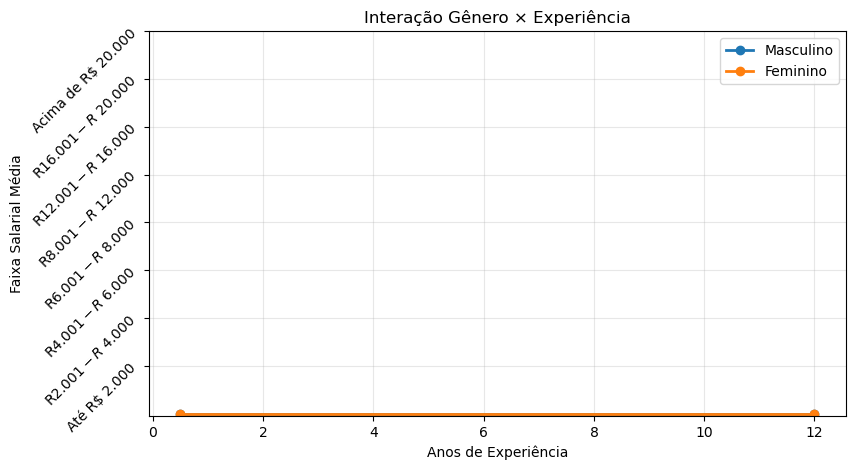


🎯 CONCLUSÃO:
A experiência afeta IGUALMENTE ambos os gêneros


In [57]:
# %%
# TESTE H₅: INTERAÇÃO GÊNERO × EXPERIÊNCIA (AJUSTADO)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# %%
# Preparar dados
exp_mapping = {
    'Menos de 1 ano': 0.5, 'De 1 a 2 anos': 1.5, 'De 2 a 3 anos': 2.5,
    'De 3 a 4 anos': 3.5, 'De 4 a 5 anos': 4.5, 'De 5 a 10 anos': 7.5,
    'Mais de 10 anos': 12.0,
    'Não tenho experiência na área de dados': 0.0
}

faixa_salarial_ord = [
    'Até R$ 2.000',
    'R$ 2.001 - R$ 4.000',
    'R$ 4.001 - R$ 6.000',
    'R$ 6.001 - R$ 8.000',
    'R$ 8.001 - R$ 12.000',
    'R$ 12.001 - R$ 16.000',
    'R$ 16.001 - R$ 20.000',
    'Acima de R$ 20.000'
]

# Mapear experiência
df['experiencia_anos'] = df['tempo_area_dados'].map(exp_mapping)

# Criar faixa salarial ordinal
df['faixa_salarial_ord'] = pd.Categorical(
    df['faixa_salarial'], categories=faixa_salarial_ord, ordered=True
).codes

# Remover nulos e quem não tem experiência
df_clean = df.dropna(subset=['experiencia_anos', 'faixa_salarial_ord'])
df_clean = df_clean[df_clean['experiencia_anos'] > 0]

print("TESTE H₅: INTERAÇÃO GÊNERO × EXPERIÊNCIA")
print("="*50)

# %%
# Calcular correlações por gênero
masc_data = df_clean[df_clean['genero'] == 'Masculino']
fem_data = df_clean[df_clean['genero'] == 'Feminino']

# Pearson
r_masc_p, p_masc_p = stats.pearsonr(masc_data['experiencia_anos'], masc_data['faixa_salarial_ord'])
r_fem_p, p_fem_p = stats.pearsonr(fem_data['experiencia_anos'], fem_data['faixa_salarial_ord'])

# Spearman
r_masc_s, p_masc_s = stats.spearmanr(masc_data['experiencia_anos'], masc_data['faixa_salarial_ord'])
r_fem_s, p_fem_s = stats.spearmanr(fem_data['experiencia_anos'], fem_data['faixa_salarial_ord'])

print(f"Correlação experiência-salário (Pearson):")
print(f"  Masculino: r = {r_masc_p:.3f}, p = {p_masc_p:.3f}")
print(f"  Feminino:  r = {r_fem_p:.3f}, p = {p_fem_p:.3f}")

print(f"\nCorrelação experiência-salário (Spearman):")
print(f"  Masculino: ρ = {r_masc_s:.3f}, p = {p_masc_s:.3f}")
print(f"  Feminino:  ρ = {r_fem_s:.3f}, p = {p_fem_s:.3f}")

# %%
# Teste de Fisher (usando Pearson)
def fishers_z_test(r1, n1, r2, n2):
    z1 = 0.5 * np.log((1 + r1) / (1 - r1))
    z2 = 0.5 * np.log((1 + r2) / (1 - r2))
    se = np.sqrt(1/(n1-3) + 1/(n2-3))
    z_stat = (z1 - z2) / se
    p_val = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_val

z_stat, p_fisher = fishers_z_test(r_masc_p, len(masc_data), r_fem_p, len(fem_data))

print(f"\nTeste de Fisher (diferença entre correlações - Pearson):")
print(f"  Z = {z_stat:.3f}, p = {p_fisher:.3f}")

# %%
# Interpretação
if p_fisher < 0.05:
    print(f"\n✓ REJEITA H₀: Interação SIGNIFICATIVA (p = {p_fisher:.3f})")
    print(f"  → O efeito da experiência DIFERE entre gêneros")
    if abs(r_masc_p) > abs(r_fem_p):
        print(f"  → Homens têm maior retorno da experiência")
    else:
        print(f"  → Mulheres têm maior retorno da experiência")
else:
    print(f"\n✗ NÃO REJEITA H₀: Sem interação significativa (p = {p_fisher:.3f})")
    print(f"  → O efeito da experiência é SIMILAR entre gêneros")

# %%
# Gráfico da interação
plt.figure(figsize=(9, 5))

for genero in ['Masculino', 'Feminino']:
    subset = df_clean[df_clean['genero'] == genero]
    medias = subset.groupby('tempo_area_dados')['faixa_salarial_ord'].mean()
    
    categorias = [
        'Menos de 1 ano', 'De 1 a 2 anos', 'De 2 a 3 anos', 
        'De 3 a 4 anos', 'De 4 a 5 anos', 'De 5 a 10 anos', 'Mais de 10 anos'
    ]
    
    x_vals = [exp_mapping[cat] for cat in categorias if cat in medias.index]
    y_vals = [medias[cat] for cat in categorias if cat in medias.index]
    
    plt.plot(x_vals, y_vals, 'o-', linewidth=2, label=genero, markersize=6)

plt.xlabel('Anos de Experiência')
plt.ylabel('Faixa Salarial Média')
plt.title('Interação Gênero × Experiência')
plt.legend()
plt.grid(True, alpha=0.3)

# Mostrar rótulos reais do salário
plt.yticks(range(len(faixa_salarial_ord)), faixa_salarial_ord, rotation=45)

plt.show()

print(f"\n🎯 CONCLUSÃO:")
if p_fisher < 0.05:
    print(f"A experiência afeta DIFERENTEMENTE homens e mulheres")
else:
    print(f"A experiência afeta IGUALMENTE ambos os gêneros")
